.. _VisualizingGraphs:

# Visualizing Provenance Graphs

.. note::

    This tutorial can be downloaded and run as a Jupyter Notebook: :download:`visualising_graphs.ipynb`
    
The provenance graph of a database can be visually inspected, *via* [graphviz](https://www.graphviz.org/), using both the python API and command-line interface.

.. seealso::

    `verdi graph generate -h`

We first load the database and required modules:

In [1]:
from aiida import load_profile
profile = load_profile()

In [2]:
from aiida.common import LinkType
from aiida.orm.utils.links import LinkPair
from aiida.tools.visualization import Graph, pstate_node_styles

The example provenance graph, used in this tutorial, can then be imported into the database:

In [24]:
dict1_uuid = '0ea79a16-501f-408a-8c84-a2704a778e4b'
work1_uuid = '9dd2ff1f-d08b-435e-adde-c9c124122e5b'

The :py:class:`~aiida.tools.visualization.graph.Graph` class is used to store visual representations of the nodes and edges, which can be added separately or cumulatively by one of the graph traversal methods.
The :py:attr:`~aiida.tools.visualization.graph.Graph.graphviz` attribute returns a [graphviz.Digraph](https://graphviz.readthedocs.io/en/stable/) instance, which will auto-magically render the graph in the notebook, or can be used to save the graph to file.

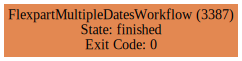

In [7]:
graph = Graph()
graph.add_node(work1_uuid)
graph.graphviz

In [ ]:
graph.add_edge(
    dict1_uuid, calc1_uuid, 
    link_pair=LinkPair(LinkType.INPUT_CALC, "input1"))
graph.graphviz

In [ ]:
graph.add_incoming(calc1_uuid)
graph.add_outgoing(calc1_uuid)
graph.graphviz

The :py:class:`~aiida.tools.visualization.graph.Graph` can also be initialized with global style attributes,
as outlined in the [graphviz attributes table](https://www.graphviz.org/doc/info/attrs.html).

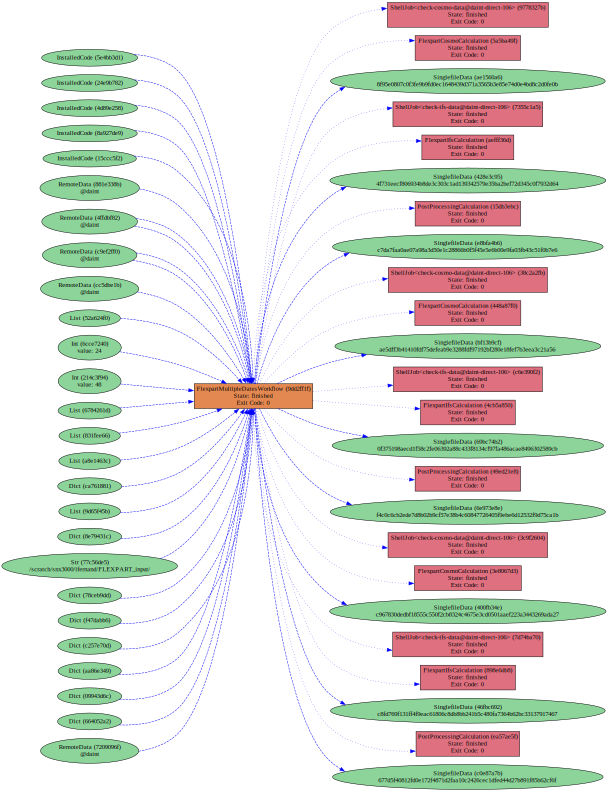

In [25]:
graph = Graph(node_id_type="uuid",
              global_node_style={"penwidth": 1},
              global_edge_style={"color": "blue"},
              graph_attr={"size": "11,11!", "rankdir": "LR"})
graph.add_incoming(work1_uuid)
graph.add_outgoing(work1_uuid)
graph.graphviz

Additionally functions can be parsed to the :py:class:`~aiida.tools.visualization.graph.Graph` initializer, to specify exactly how each node will be represented. For example, the :py:func:`~aiida.tools.visualization.graph.pstate_node_styles` function colors process nodes by their process state.

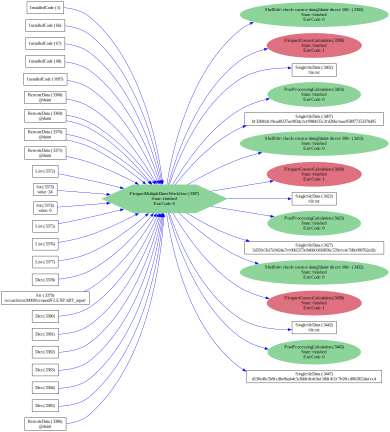

In [4]:
def link_style(link_pair, **kwargs):
    return {"color": "blue"}

graph = Graph(node_style_fn=pstate_node_styles,
              link_style_fn=link_style,
              graph_attr={"size": "6,6!", "rankdir": "LR"})
graph.add_incoming(work1_uuid)
graph.add_outgoing(work1_uuid)
graph.graphviz

Edges can be annotated by one or both of their edge label and link type.

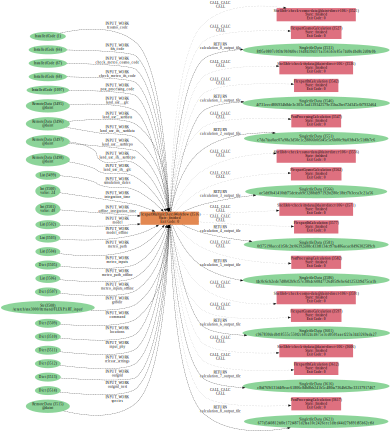

In [26]:
graph = Graph(graph_attr={"size": "6,6!", "rankdir": "LR"})
graph.add_incoming(work1_uuid,
                   annotate_links="both")
graph.add_outgoing(work1_uuid,
                   annotate_links="both")
graph.graphviz

The :meth:`~aiida.tools.visualization.graph.Graph.recurse_descendants` and :meth:`~aiida.tools.visualization.graph.Graph.recurse_ancestors` methods can be used to construct a full provenance graph. 

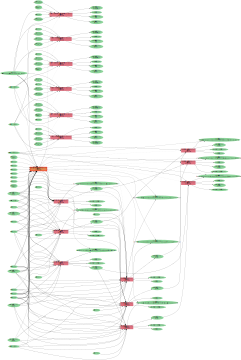

In [31]:
graph = Graph(graph_attr={"size": "5,5!", "rankdir": "LR"})
graph.recurse_descendants(
    work1_uuid,
    include_process_inputs=True,
    #annotate_links="both"
)
graph.graphviz

The link types can also be filtered, to view only the 'data' or 'logical' provenance.

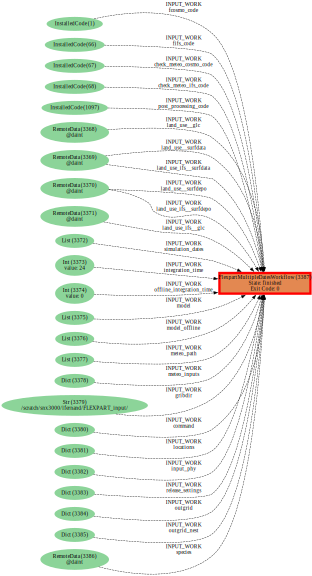

In [14]:
graph = Graph(graph_attr={"size": "8,8!", "rankdir": "LR"})
graph.recurse_descendants(
    work1_uuid, 
    include_process_inputs=True,
    annotate_links="both",
    link_types=("input_calc", "create")
)
graph.graphviz

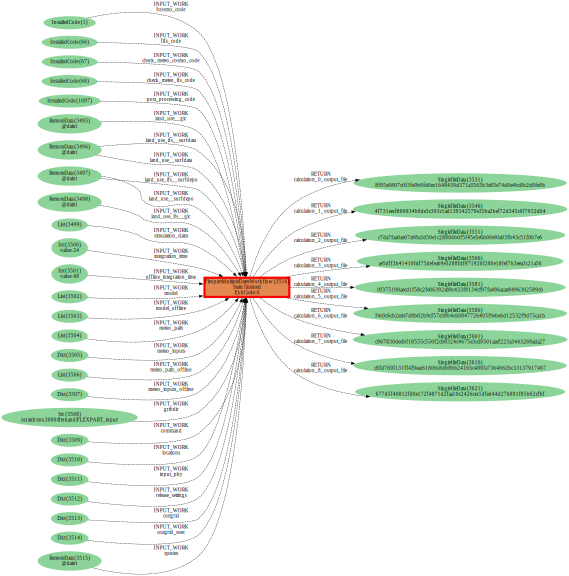

In [28]:
graph = Graph(graph_attr={"size": "8,8!", "rankdir": "LR"})
graph.recurse_descendants(
    work1_uuid,
    include_process_inputs=True,
    annotate_links="both",
    link_types=("input_work", "return")
)
graph.graphviz